In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
df = pd.read_csv(r"C:\Users\parth\Documents\ML\train.csv")

In [64]:
#Data Cleaning
df.rename(columns={'#YY': 'year'}, inplace=True)
df['datetime'] = pd.to_datetime({
    'year': df['year'],
    'month': df['MM'],
    'day': df['DD'],
    'hour': df['hh'],
    'minute': df['mm']
})
df.set_index('datetime', inplace=True)
df.sort_index(inplace=True)
df.drop(columns=['year','MM','DD','hh','mm'], inplace=True)

In [65]:
print(df.index)
print(df.index.dtype)


DatetimeIndex(['2017-04-24 01:50:00', '2017-04-24 02:50:00',
               '2017-04-24 03:50:00', '2017-04-24 04:50:00',
               '2017-04-24 05:50:00', '2017-04-24 06:50:00',
               '2017-04-24 07:50:00', '2017-04-24 08:50:00',
               '2017-04-24 09:50:00', '2017-04-24 10:50:00',
               ...
               '2019-06-26 06:40:00', '2019-06-26 07:40:00',
               '2019-06-26 08:40:00', '2019-06-26 09:40:00',
               '2019-06-28 00:40:00', '2019-06-28 01:40:00',
               '2019-06-28 02:40:00', '2019-06-28 03:40:00',
               '2019-06-28 04:40:00', '2019-06-28 18:40:00'],
              dtype='datetime64[ns]', name='datetime', length=3886, freq=None)
datetime64[ns]


In [66]:
df.head()

,ID,WDIR(degT),WSPD(m/s),GST(m/s),DPD(sec),APD(sec),MWD(degT),PRES(hPa),ATMP(degC),WTMP(degC),DEWP(degC),WVHT(m)
datetime,,,,,,,,,,,,
2017-04-24 01:50:00,2017424150,23,3.0,3.6,4.17,3.33,349,1019.1,4.7,5.1,4.2,0.39
2017-04-24 02:50:00,2017424250,30,2.9,3.3,5.26,4.21,358,1018.8,4.6,4.8,4.1,0.65
2017-04-24 03:50:00,2017424350,360,2.2,2.5,5.88,4.79,11,1018.3,4.6,4.7,4.2,0.90
2017-04-24 04:50:00,2017424450,355,2.5,3.1,5.88,4.95,23,1018.1,4.6,4.6,4.2,0.91
2017-04-24 05:50:00,2017424550,355,3.5,4.5,6.25,4.98,26,1018.3,4.5,4.6,4.0,0.88


In [67]:
#Rolling and lagging features
df['WSPD_lag1'] = df['WSPD(m/s)'].shift(1)
df['WSPD_lag3'] = df['WSPD(m/s)'].shift(3)
df['WVHT_lag1'] = df['WVHT(m)'].shift(1)
df.dropna(inplace=True)


In [68]:
df['WSPD_roll3'] = df['WSPD(m/s)'].rolling(3).mean()
df['PRES_roll6'] = df['PRES(hPa)'].rolling(6).mean()
df['WVHT_roll3'] = df['WVHT(m)'].rolling(3).mean()
df['WSPD_std3'] = df['WSPD(m/s)'].rolling(3).std()
#Avg wspd over 3 hrs etc

In [69]:
df.dropna(inplace=True)
df.head()

,ID,WDIR(degT),WSPD(m/s),GST(m/s),DPD(sec),APD(sec),MWD(degT),PRES(hPa),ATMP(degC),WTMP(degC),DEWP(degC),WVHT(m),WSPD_lag1,WSPD_lag3,WVHT_lag1,WSPD_roll3,PRES_roll6,WVHT_roll3,WSPD_std3
datetime,,,,,,,,,,,,,,,,,,,
2017-04-24 09:50:00,2017424950,25,2.3,2.6,6.25,4.98,17,1017.2,4.8,4.6,4.3,0.83,1.3,2.6,0.75,1.766667,1017.633333,0.793333,0.503322
2017-04-24 10:50:00,20174241050,51,3.4,3.7,6.25,4.77,6,1017.1,5.7,4.6,4.7,0.69,2.3,1.7,0.83,2.333333,1017.466667,0.756667,1.050397
2017-04-24 11:50:00,20174241150,53,3.7,4.1,5.26,4.48,358,1017.5,5.7,4.6,4.8,0.59,3.4,1.3,0.69,3.133333,1017.333333,0.703333,0.737111
2017-04-24 12:50:00,20174241250,57,3.4,3.9,5.88,4.70,358,1018.0,5.7,4.7,4.8,0.61,3.7,2.3,0.59,3.500000,1017.383333,0.630000,0.173205
2017-04-24 13:50:00,20174241350,65,3.5,3.9,5.88,4.59,350,1017.8,5.7,4.7,5.0,0.55,3.4,3.4,0.61,3.533333,1017.450000,0.583333,0.152753


In [70]:
#Converting direction to sin and cos 
df['WDIR_sin'] = np.sin(np.deg2rad(df['WDIR(degT)']))
df['WDIR_cos'] = np.cos(np.deg2rad(df['WDIR(degT)']))

df['MWD_sin'] = np.sin(np.deg2rad(df['MWD(degT)']))
df['MWD_cos'] = np.cos(np.deg2rad(df['MWD(degT)']))

df.drop(columns=['WDIR(degT)','MWD(degT)'], inplace=True)
df.drop(columns=['ID'], inplace=True)

In [71]:
df.head()

,WSPD(m/s),GST(m/s),DPD(sec),APD(sec),PRES(hPa),ATMP(degC),WTMP(degC),DEWP(degC),WVHT(m),WSPD_lag1,WSPD_lag3,WVHT_lag1,WSPD_roll3,PRES_roll6,WVHT_roll3,WSPD_std3,WDIR_sin,WDIR_cos,MWD_sin,MWD_cos
datetime,,,,,,,,,,,,,,,,,,,,
2017-04-24 09:50:00,2.3,2.6,6.25,4.98,1017.2,4.8,4.6,4.3,0.83,1.3,2.6,0.75,1.766667,1017.633333,0.793333,0.503322,0.422618,0.906308,0.292372,0.956305
2017-04-24 10:50:00,3.4,3.7,6.25,4.77,1017.1,5.7,4.6,4.7,0.69,2.3,1.7,0.83,2.333333,1017.466667,0.756667,1.050397,0.777146,0.629320,0.104528,0.994522
2017-04-24 11:50:00,3.7,4.1,5.26,4.48,1017.5,5.7,4.6,4.8,0.59,3.4,1.3,0.69,3.133333,1017.333333,0.703333,0.737111,0.798636,0.601815,-0.034899,0.999391
2017-04-24 12:50:00,3.4,3.9,5.88,4.70,1018.0,5.7,4.7,4.8,0.61,3.7,2.3,0.59,3.500000,1017.383333,0.630000,0.173205,0.838671,0.544639,-0.034899,0.999391
2017-04-24 13:50:00,3.5,3.9,5.88,4.59,1017.8,5.7,4.7,5.0,0.55,3.4,3.4,0.61,3.533333,1017.450000,0.583333,0.152753,0.906308,0.422618,-0.173648,0.984808


In [72]:
df['WSPD_sq'] = df['WSPD(m/s)']**2
df['wind_pressure'] = df['WSPD(m/s)'] * df['PRES(hPa)']


In [73]:
df['month'] = df.index.month
df['hour'] = df.index.hour


In [74]:
df['month_sin'] = np.sin(2*np.pi*df['month']/12)
df['month_cos'] = np.cos(2*np.pi*df['month']/12)
df['hour_sin'] = np.sin(2*np.pi*df['hour']/24)
df['hour_cos'] = np.cos(2*np.pi*df['hour']/24)


In [75]:
df.head()

,WSPD(m/s),GST(m/s),DPD(sec),APD(sec),PRES(hPa),ATMP(degC),WTMP(degC),DEWP(degC),WVHT(m),WSPD_lag1,...,MWD_sin,MWD_cos,WSPD_sq,wind_pressure,month,hour,month_sin,month_cos,hour_sin,hour_cos
datetime,,,,,,,,,,,,,,,,,,,,,
2017-04-24 09:50:00,2.3,2.6,6.25,4.98,1017.2,4.8,4.6,4.3,0.83,1.3,...,0.292372,0.956305,5.29,2339.56,4,9,0.866025,-0.5,7.071068e-01,-0.707107
2017-04-24 10:50:00,3.4,3.7,6.25,4.77,1017.1,5.7,4.6,4.7,0.69,2.3,...,0.104528,0.994522,11.56,3458.14,4,10,0.866025,-0.5,5.000000e-01,-0.866025
2017-04-24 11:50:00,3.7,4.1,5.26,4.48,1017.5,5.7,4.6,4.8,0.59,3.4,...,-0.034899,0.999391,13.69,3764.75,4,11,0.866025,-0.5,2.588190e-01,-0.965926
2017-04-24 12:50:00,3.4,3.9,5.88,4.70,1018.0,5.7,4.7,4.8,0.61,3.7,...,-0.034899,0.999391,11.56,3461.20,4,12,0.866025,-0.5,1.224647e-16,-1.000000
2017-04-24 13:50:00,3.5,3.9,5.88,4.59,1017.8,5.7,4.7,5.0,0.55,3.4,...,-0.173648,0.984808,12.25,3562.30,4,13,0.866025,-0.5,-2.588190e-01,-0.965926


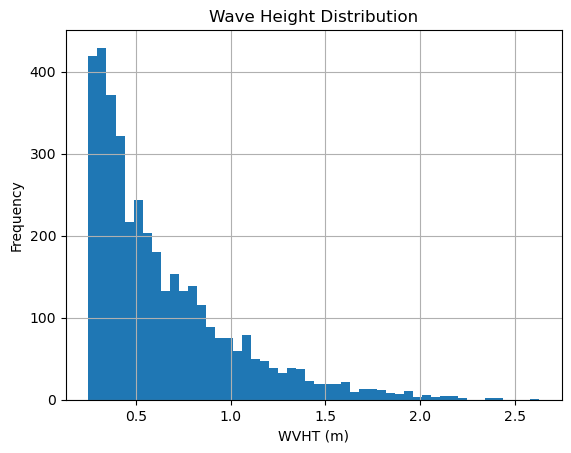

In [76]:
import matplotlib.pyplot as plt

plt.figure()
df['WVHT(m)'].hist(bins=50)
plt.title("Wave Height Distribution")
plt.xlabel("WVHT (m)")
plt.ylabel("Frequency")
plt.show()


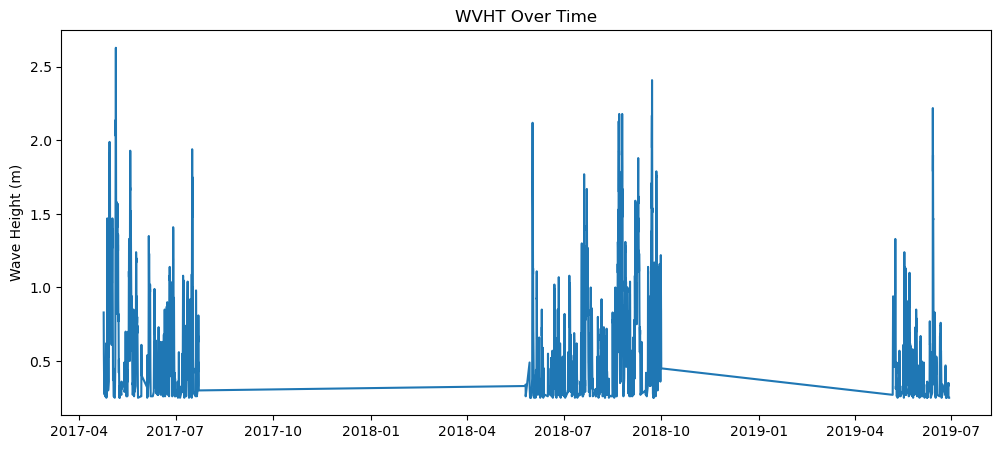

In [77]:
plt.figure(figsize=(12,5))
plt.plot(df.index, df['WVHT(m)'])
plt.title("WVHT Over Time")
plt.ylabel("Wave Height (m)")
plt.show()

In [78]:
monthly_avg = df['WVHT(m)'].groupby(df.index.month).mean()
print(monthly_avg)

datetime
4    0.850171
5    0.661828
6    0.527073
7    0.605876
8    0.691059
9    0.796962
Name: WVHT(m), dtype: float64


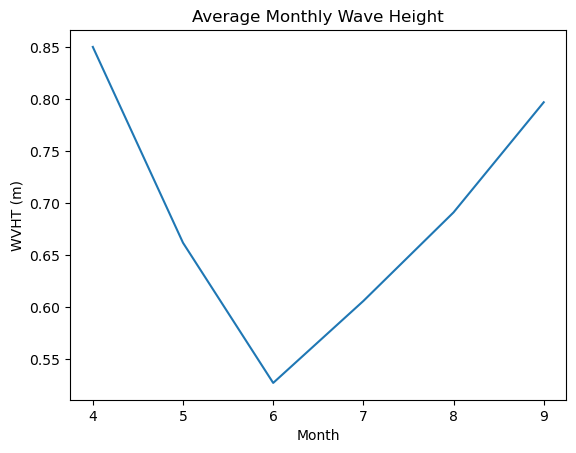

In [79]:
monthly_avg.plot()
plt.title("Average Monthly Wave Height")
plt.xlabel("Month")
plt.ylabel("WVHT (m)")
plt.show()

In [80]:
df['month'] = df.index.month

df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

In [81]:
df.drop(columns=['month'], inplace=True)


In [82]:
monthly_max = df['WVHT(m)'].groupby(df.index.month).max()
print(monthly_max)

datetime
4    1.99
5    2.63
6    2.22
7    1.94
8    2.18
9    2.41
Name: WVHT(m), dtype: float64


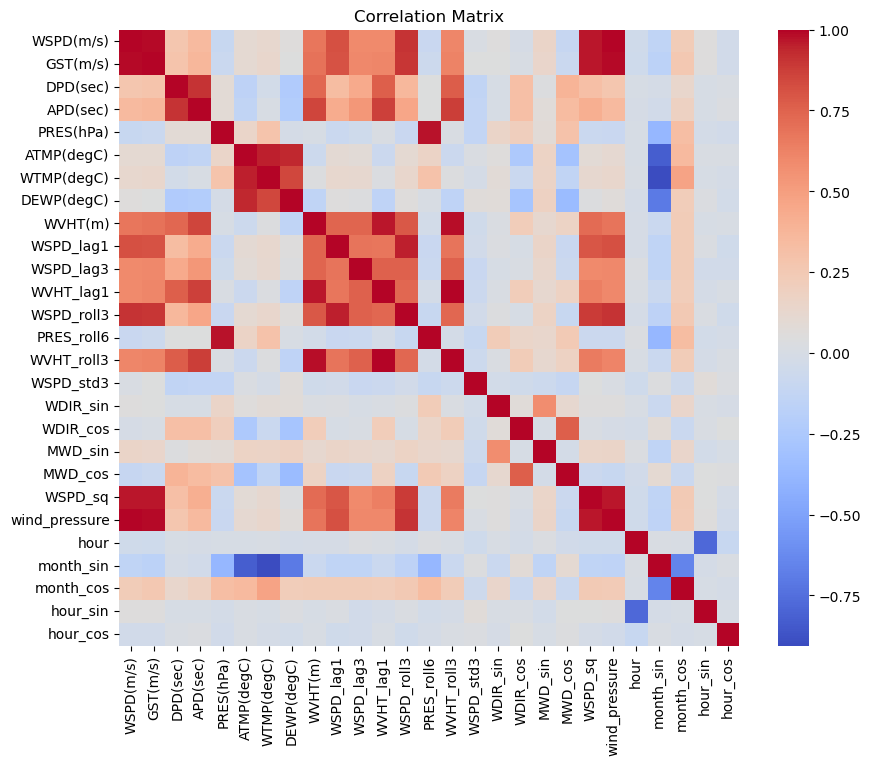

In [83]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Matrix")
plt.show()

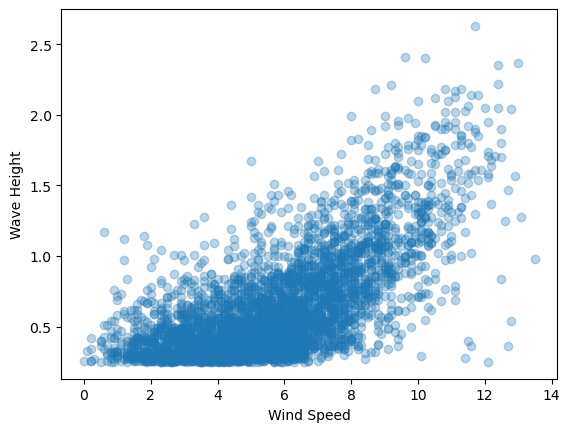

In [84]:
plt.figure()
plt.scatter(df['WSPD(m/s)'], df['WVHT(m)'], alpha=0.3)
plt.xlabel("Wind Speed")
plt.ylabel("Wave Height")
plt.show()

In [85]:
extreme = df[df['WVHT(m)'] > 2]  # adjust threshold
print(extreme[['WSPD(m/s)','GST(m/s)','PRES(hPa)']].describe())


       WSPD(m/s)   GST(m/s)    PRES(hPa)
count  24.000000  24.000000    24.000000
mean   11.179167  13.525000  1014.170833
std     1.100189   1.385091     6.246006
min     8.700000  10.400000  1006.800000
25%    10.725000  12.700000  1008.850000
50%    11.200000  13.850000  1012.100000
75%    11.850000  14.450000  1018.050000
max    13.000000  15.900000  1025.200000


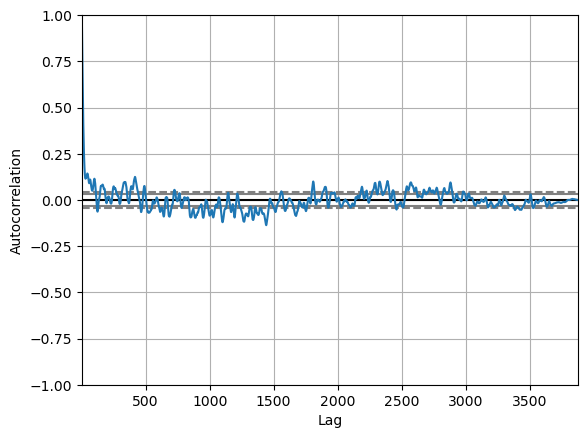

In [86]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['WVHT(m)'])
plt.show()


In [87]:
X = df.drop(columns=['WVHT(m)'])
y = df['WVHT(m)']

In [88]:
#ML
split_index = int(len(df) * 0.8)

X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]

y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]


In [89]:
y_pred_persistence = y_test.shift(1)

from sklearn.metrics import mean_squared_error
import numpy as np

rmse_persistence = np.sqrt(mean_squared_error(y_test[1:], y_pred_persistence[1:]))

print("Persistence RMSE:", rmse_persistence)


Persistence RMSE: 0.08509880405512701


In [91]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print("Linear Regression RMSE:", rmse_lr)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression")
print("RMSE:", rmse_lr)
print("MAE :", mae_lr)
print("R2  :", r2_lr)


Linear Regression RMSE: 0.05580319610772375
Linear Regression
RMSE: 0.05580319610772375
MAE : 0.03895228089956218
R2  : 0.95985440937089


In [92]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("Random Forest RMSE:", rmse_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest")
print("RMSE:", rmse_rf)
print("MAE :", mae_rf)
print("R2  :", r2_rf)

Random Forest RMSE: 0.05210016861593516
Random Forest
RMSE: 0.05210016861593516
MAE : 0.03391700058373716
R2  : 0.9650056475154274


In [93]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    random_state=42
)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print("XGBoost RMSE:", rmse_xgb)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost")
print("RMSE:", rmse_xgb)
print("MAE :", mae_xgb)
print("R2  :", r2_xgb)


XGBoost RMSE: 0.04836633850941129
XGBoost
RMSE: 0.04836633850941129
MAE : 0.033802824909846804
R2  : 0.969841750728344


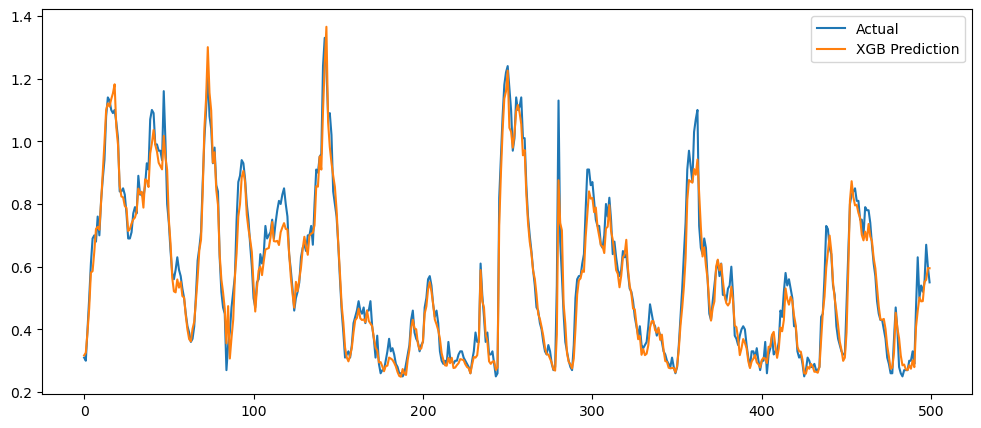

In [94]:
plt.figure(figsize=(12,5))
plt.plot(y_test.values[:500], label='Actual')
plt.plot(y_pred_xgb[:500], label='XGB Prediction')
plt.legend()
plt.show()

In [95]:
storm_mask = y_test > 2  # adjust threshold

rmse_storm_rf = np.sqrt(mean_squared_error(
    y_test[storm_mask],
    y_pred_rf[storm_mask]
))

print("Storm RMSE (RF):", rmse_storm_rf)

Storm RMSE (RF): 0.36070009949669535


In [96]:
#Using LSTM
features = df.columns  # include everything including WVHT
split_index = int(len(df) * 0.8)

train_df = df.iloc[:split_index]
test_df = df.iloc[split_index:]

In [97]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_scaled = scaler.fit_transform(train_df)
test_scaled = scaler.transform(test_df)


In [98]:
df.head()

,WSPD(m/s),GST(m/s),DPD(sec),APD(sec),PRES(hPa),ATMP(degC),WTMP(degC),DEWP(degC),WVHT(m),WSPD_lag1,...,WDIR_cos,MWD_sin,MWD_cos,WSPD_sq,wind_pressure,hour,month_sin,month_cos,hour_sin,hour_cos
datetime,,,,,,,,,,,,,,,,,,,,,
2017-04-24 09:50:00,2.3,2.6,6.25,4.98,1017.2,4.8,4.6,4.3,0.83,1.3,...,0.906308,0.292372,0.956305,5.29,2339.56,9,0.866025,-0.5,7.071068e-01,-0.707107
2017-04-24 10:50:00,3.4,3.7,6.25,4.77,1017.1,5.7,4.6,4.7,0.69,2.3,...,0.629320,0.104528,0.994522,11.56,3458.14,10,0.866025,-0.5,5.000000e-01,-0.866025
2017-04-24 11:50:00,3.7,4.1,5.26,4.48,1017.5,5.7,4.6,4.8,0.59,3.4,...,0.601815,-0.034899,0.999391,13.69,3764.75,11,0.866025,-0.5,2.588190e-01,-0.965926
2017-04-24 12:50:00,3.4,3.9,5.88,4.70,1018.0,5.7,4.7,4.8,0.61,3.7,...,0.544639,-0.034899,0.999391,11.56,3461.20,12,0.866025,-0.5,1.224647e-16,-1.000000
2017-04-24 13:50:00,3.5,3.9,5.88,4.59,1017.8,5.7,4.7,5.0,0.55,3.4,...,0.422618,-0.173648,0.984808,12.25,3562.30,13,0.866025,-0.5,-2.588190e-01,-0.965926


In [99]:
target_index = df.columns.get_loc("WVHT(m)")


In [102]:
def create_sequences(data, target_index, time_steps=24):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i])
        y.append(data[i, target_index])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_scaled, target_index, 24)
X_test, y_test = create_sequences(test_scaled, target_index, 24)


In [103]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')


C:\Users\parth\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [104]:
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)


Epoch 1/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0118 - val_loss: 0.0039
Epoch 2/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0031 - val_loss: 0.0026
Epoch 3/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0022 - val_loss: 0.0021
Epoch 4/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 5/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 6/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0016 - val_loss: 0.0017
Epoch 7/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0015 - val_loss: 0.0024
Epoch 8/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 9/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 10/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 11/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0013 - val_loss: 0.0021
Epoch 12/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0

In [105]:
y_pred_scaled = model.predict(X_test)

temp = np.zeros((len(y_pred_scaled), train_scaled.shape[1]))
temp[:, target_index] = y_pred_scaled[:,0]
y_pred = scaler.inverse_transform(temp)[:, target_index]

temp_true = np.zeros((len(y_test), train_scaled.shape[1]))
temp_true[:, target_index] = y_test
y_true = scaler.inverse_transform(temp_true)[:, target_index]


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


In [106]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse_lstm = np.sqrt(mean_squared_error(y_true, y_pred))
print("LSTM RMSE:", rmse_lstm)

LSTM RMSE: 0.09227653638578241


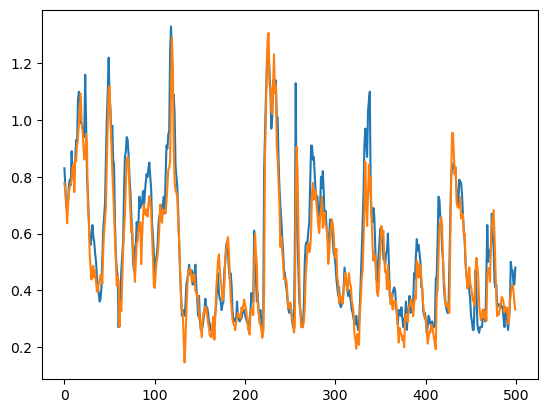

In [107]:
plt.plot(y_true[:500])
plt.plot(y_pred[:500])
plt.show()


In [108]:
rmse_lstm = np.sqrt(mean_squared_error(y_true, y_pred))
mae_lstm = mean_absolute_error(y_true, y_pred)
r2_lstm = r2_score(y_true, y_pred)

print("LSTM")
print("RMSE:", rmse_lstm)
print("MAE :", mae_lstm)
print("R2  :", r2_lstm)


LSTM
RMSE: 0.09227653638578241
MAE : 0.06227260079106038
R2  : 0.8874888099907642


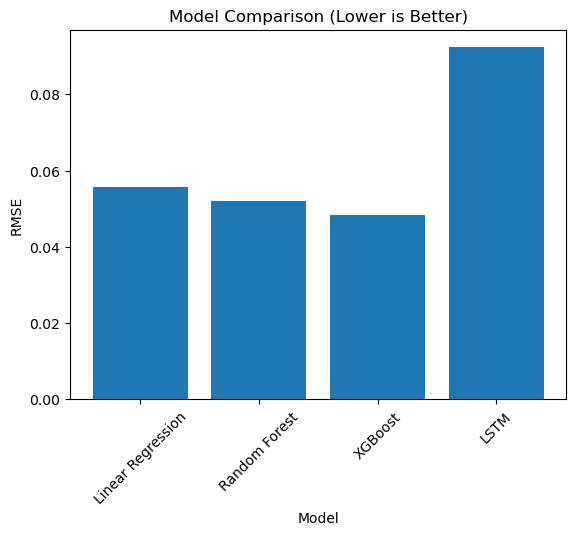

In [110]:
models = ["Linear Regression", "Random Forest", "XGBoost", "LSTM"]
rmse_values = [rmse_lr, rmse_rf, rmse_xgb, rmse_lstm]

plt.figure()
plt.bar(models, rmse_values)

plt.xlabel("Model")
plt.ylabel("RMSE")
plt.title("Model Comparison (Lower is Better)")
plt.xticks(rotation=45)

plt.show()

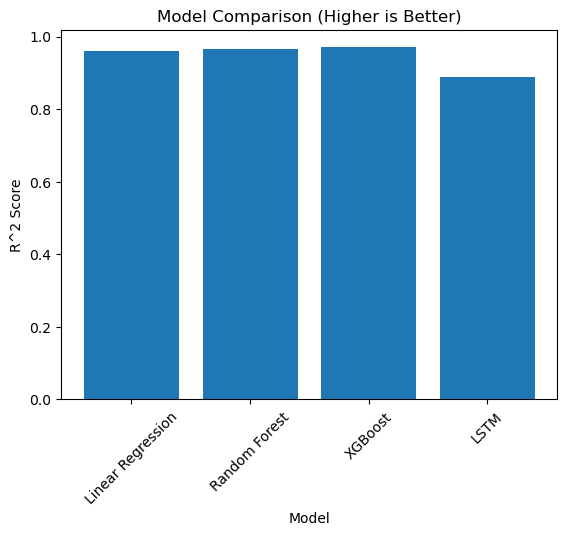

In [115]:
models = ["Linear Regression", "Random Forest", "XGBoost", "LSTM"]
r2_values = [r2_lr, r2_rf, r2_xgb, r2_lstm]

plt.figure()
plt.bar(models, rmse_values)

plt.xlabel("Model")
plt.ylabel("R^2 Score")
plt.title("Model Comparison (Higher is Better)")
plt.xticks(rotation=45)

plt.show()

In [116]:
print(models)
print(r2_values)

['Linear Regression', 'Random Forest', 'XGBoost', 'LSTM']
[0.95985440937089, 0.9650056475154274, 0.969841750728344, 0.8874888099907642]
